# __Final project__:
## Introduction to  Data Analytics 2021 

---

### Presented by Talya Kapri , Noa Malihi, Shneor Yom Tov and Shalom Schwartz :)

## In our project we will be analyzing  Salary Data:

In [1]:
pip install -U seaborn




SyntaxError: invalid syntax (3227915807.py, line 1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse


In [3]:
url = 'https://raw.githubusercontent.com/shneoryomtov/shneor/main/wage_predict%20(1).csv'

In [5]:
data = pd.read_csv(url)
data.head(2)

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333330
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333


In [6]:
data.dtypes

industry                  object
occupation                 int64
yrs_qual                   int64
sex                        int64
highest_qual               int64
area_of_study              int64
influencing                int64
negotiating                int64
sector                     int64
workforce_change           int64
no_subordinates            int64
choose_hours               int64
choose_method              int64
job_quals                  int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                   int64
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

In [10]:
original_data = data.copy(deep = True)
original_data['industry'] = original_data['industry'].astype('category').cat.codes
original_data = original_data.drop(columns=['job_quals','highest_qual'])

## Wrangling the data:

1. Treat weird things your data might have
2. Treat column names (if needed)
3. Treat data types (if needed)
4. Treat missing values (if needed)



In [19]:
data['industry'] = data['industry'].replace(['A','B',"C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U"]
,['Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, steam and air conditioning supply'
,'Water supply; sewerage, waste management and remediation activities','Construction','Wholesale and retail trade; repair of motor vehicles and motorcycles'
,'Transportation and storage','Accommodation and food service activities','Information and communication','Financial and insurance activities','Real estate activities','High-Tech','Administrative and support service activities','Public administration and defence; compulsory social security','Education','Human health and social work activities','Arts, entertainment and recreation','Other service activities','Activities of households as employers; undifferentiated goods','Activities of extraterritorial organizations and bodies'])
data['occupation']=data['occupation'].replace([0,1,2,3,4,5,6,7,8,9],
[ 'Armed forces','Managers','Professionals','Associate professionals','Clerks','Service workers','Agricultural workers','Craft workers','Machine operators','Elementary occupations'])
data['sex'] = data['sex'].replace([1,2],['Male','Female'])
data['computer'] = data['computer'].replace([1,2],['Yes','No'])
data['sector'] = data['sector'].replace([1,2,3],['private sector','The public sector','A non-profit organisation'])
data = data.rename(columns = {'yrs_qual': 'years_of_study'}, inplace = False)
data = data.rename(columns = {'no_subordinates': 'num_employees'}, inplace = False)
data['area_of_study'] = data['area_of_study'].replace([0,1,2,3,4,5,6,7,8,9],['Did not study','General programs','Teacher training and education science','Humanities, languages and arts','Social sciences, business and law','Science, mathematics and computing','Engineering, manufacturing and construction','Agriculture and veterinary','Health and welfare','Services'])
data['satisfaction'] = data['satisfaction'].replace([1,2,3,4,5],[5,4,3,2,1])
data['workforce_change'] = data['workforce_change'].replace([1,2,3],[3,2,1])


When we read our data for the first time the number values weren't in any spacific order which is why we changed the values so that the number one represents the least amount and number five represents the most.

In [12]:
salary_data = data.drop(columns=['job_quals','highest_qual'])

we removed these columns because they we're irelevant to our project.

In [13]:
salary_data.head()

,industry,occupation,years_of_study,sex,area_of_study,influencing,negotiating,sector,workforce_change,num_employees,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Human health and social work activities,Professionals,19,Male,"Social sciences, business and law",2,1,private sector,1,3,...,5,4,5,4,4,5,Yes,1,2,23833.333330
1,Manufacturing,Elementary occupations,14,Male,Agriculture and veterinary,4,2,private sector,3,0,...,5,3,5,3,4,5,Yes,1,1,6583.333333
2,Real estate activities,Associate professionals,16,Female,"Social sciences, business and law",2,1,private sector,1,0,...,3,1,4,2,1,5,Yes,1,2,433.333333
3,Human health and social work activities,Service workers,12,Female,"Social sciences, business and law",5,4,The public sector,3,0,...,5,2,5,2,5,5,No,1,0,379.000000
4,Education,Managers,18,Male,"Social sciences, business and law",3,4,A non-profit organisation,1,0,...,4,2,5,4,1,5,Yes,2,2,4583.333333


### Fixing data types


In [14]:
salary_data.dtypes

industry                  object
occupation                object
years_of_study             int64
sex                       object
area_of_study             object
influencing                int64
negotiating                int64
sector                    object
workforce_change           int64
num_employees              int64
choose_hours               int64
choose_method              int64
qual_needed                int64
experience_needed          int64
keeping_current            int64
satisfaction               int64
advising                   int64
instructing                int64
problem_solving_quick      int64
problem_solving_long       int64
labour                     int64
manual_skill               int64
computer                  object
group_meetings             int64
computer_level             int64
monthly_salary           float64
dtype: object

#### no data types need fixing

In [15]:
salary_data.isnull().sum()

industry                 0
occupation               0
years_of_study           0
sex                      0
area_of_study            0
influencing              0
negotiating              0
sector                   0
workforce_change         0
num_employees            0
choose_hours             0
choose_method            0
qual_needed              0
experience_needed        0
keeping_current          0
satisfaction             0
advising                 0
instructing              0
problem_solving_quick    0
problem_solving_long     0
labour                   0
manual_skill             0
computer                 0
group_meetings           0
computer_level           0
monthly_salary           0
dtype: int64

### no missing values :)

***

## _let's dive in..._

1. [ monthly salary and correlations.](#section1)
2. [Sector](#section2)
3. [Men vs Women](#section3)
4. [Prediction](#section4)



# 1. monthly salary and correlations.

<Axes: xlabel='monthly_salary', ylabel='Count'>

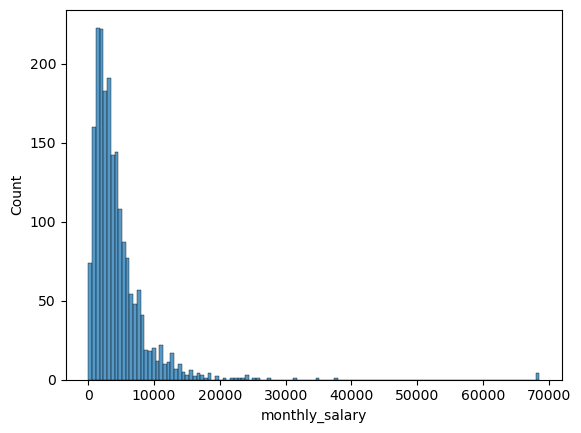

In [16]:
sns.histplot(salary_data['monthly_salary'])

 We can see that most of the salaries are up to 10,000$.

_We chose four columns that we thought would have a strong correlation._

<Axes: >

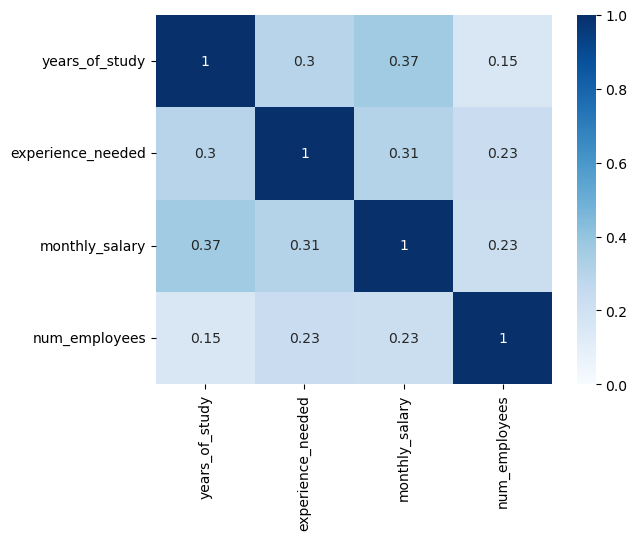

In [17]:
features = ['years_of_study','experience_needed','monthly_salary','num_employees']
correlation_matrix = salary_data[features].corr()
sns.heatmap(correlation_matrix, vmin=0.0 , vmax = 1,cmap='Blues' , annot=True)

 _surprisingly they have a relatively low correlation._ 
 - The highest correlation with monthly salary is with years of study.


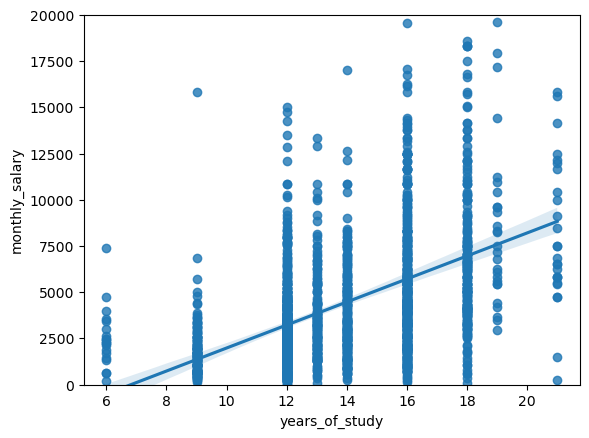

In [18]:
sns.regplot(x = 'years_of_study', y = 'monthly_salary', data=salary_data)
plt.ylim(0,20000)
plt.show()

There's an upward trend between years of study and monthly salary.

 ## Satisfaction 
 

Do you think people who make more money are more satisfied?

In [14]:
features = ['satisfaction','monthly_salary']
salary_data[features].corr()


,satisfaction,monthly_salary
satisfaction,1.000000,0.087306
monthly_salary,0.087306,1.000000


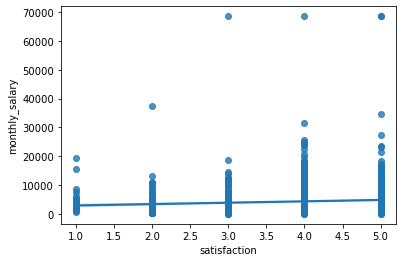

In [15]:
sns.regplot(x = 'satisfaction', y = 'monthly_salary', data=salary_data)

We can't see any type of trend in this graph which indicates that there is a very low connection between the level of satisfaction and monthly salary.

In [16]:
satisfction_per_industry = salary_data.groupby('industry')[['satisfaction',"monthly_salary"]].mean().sort_values("satisfaction",ascending=False)
satisfction_per_industry.head(3)

,satisfaction,monthly_salary
industry,,
"Water supply; sewerage, waste management and remediation activities",4.300000,4238.450000
Other service activities,4.270270,2810.409009
"Electricity, gas, steam and air conditioning supply",4.210526,6092.326315


We wanted to check in which industry are people most satisfied.                       
Surprisingly people who work with garbage are most satisfied.

---

> ## observation 1:
> After intensive research we found that there's a connection between monthly salary and the amount of years studied.                          
> The norm is usually when a person makes more money they are more satisfied with there job, yet we discovred that there is a very small connection between the two.             



---

# 2. sector :


#### Let's check the differences between sectors:

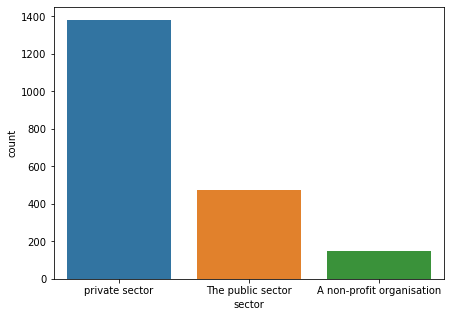

In [17]:
plt.figure(figsize=(7,5)) 
sns.countplot(x="sector", data=salary_data)

Most people work in the private sector.

_Is the sector with the highest average monthly salary, the workforce change is the lowest..?_

In [18]:
salary_data.pivot_table(['monthly_salary','workforce_change'],'sector').sort_values("monthly_salary",ascending=False)

,monthly_salary,workforce_change
sector,,
The public sector,4827.162379,1.612632
A non-profit organisation,4784.990889,1.671141
private sector,4202.807985,1.737871


> Turns out that is the case (which makes sense).


 - Even though The highest average monthly salary is in the public sector, most people still work in the private sector.

In [19]:
salary_data.groupby(['industry',"sector"])[["monthly_salary"]].mean().sort_values("monthly_salary",ascending=False).head(6)

,,monthly_salary
industry,sector,
Information and communication,A non-profit organisation,9666.666667
Activities of extraterritorial organizations and bodies,A non-profit organisation,8583.333333
Financial and insurance activities,The public sector,8121.961112
Information and communication,The public sector,7772.407407
High-Tech,private sector,7177.692688
Financial and insurance activities,private sector,6769.319238


We wanted to check for each industry in which sector is the monthly salary the highest.                          

Let's look on the High Tech for example:

In [20]:
tech = salary_data[salary_data['industry'].str.contains('High-Tech')].copy()

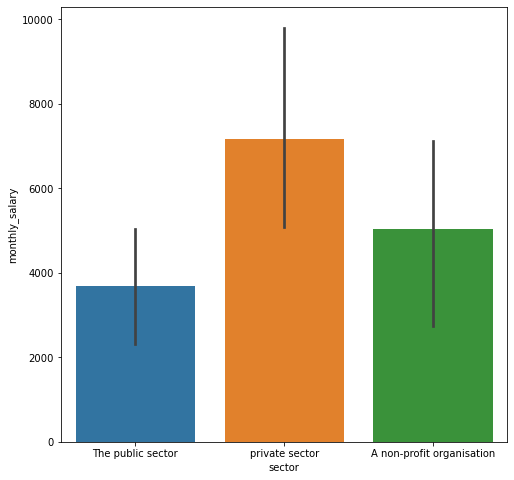

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(x="sector", y="monthly_salary",  data=tech)
plt.show()

We can see that a person that wants to work in High Tech should work in the private sector.

---

> ## observation 2:
> There are big differences btween the private and the public sector.                                          
> The private sector has the lowest average monthly salary and yet most people work in that sector.




---

# 3. Men vs Women
- __Introduction__
- __Occupation__



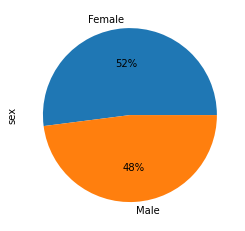

In [22]:
salary_data['sex'].value_counts().plot.pie(autopct='%1.f%%')

There are more women in our data.

In [23]:
female_df = salary_data.loc[data.sex == 'Female']
male_df = salary_data.loc[data.sex == 'Male']

(0.0, 20000.0)

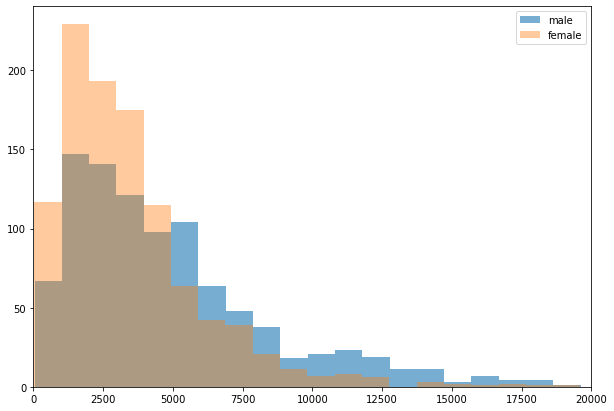

In [24]:
plt.figure(figsize=(10,7))
plt.hist(male_df['monthly_salary'], alpha=0.6, label='male',bins = 70)
plt.hist(female_df['monthly_salary'], alpha=0.4, label='female',bins = 70)
plt.legend(loc='upper right')
plt.xlim(0,20000)

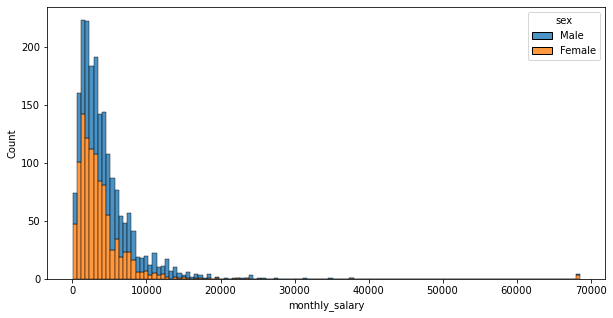

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(salary_data ,x="monthly_salary", hue="sex",multiple="stack", alpha=0.8)

There are more women who make up to 5,000.                              
There are more men who make above 5,000 then women.

In [26]:
salary_data.pivot_table(['monthly_salary','years_of_study','choose_hours'],'sex').sort_values("monthly_salary",ascending=False)

,choose_hours,monthly_salary,years_of_study
sex,,,
Male,2.685031,5144.050426,13.818087
Female,2.654842,3702.173624,13.932886


 - Women and men choose more or less the same amount of hours and still men make much more money.      
 - Men and women invest more or less the same amount of years in there education and still men make more money.

(0.0, 20000.0)

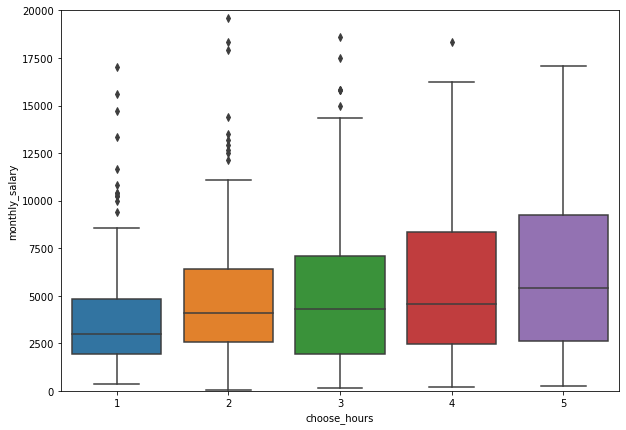

In [27]:
fig, axes = plt.subplots(figsize=(10,7), ncols=1)
sns.boxplot(x='choose_hours', y='monthly_salary', data=male_df)
plt.ylim(0,20000)

Men who get to choose there hours more freely have a higher monthly salary.

(0.0, 20000.0)

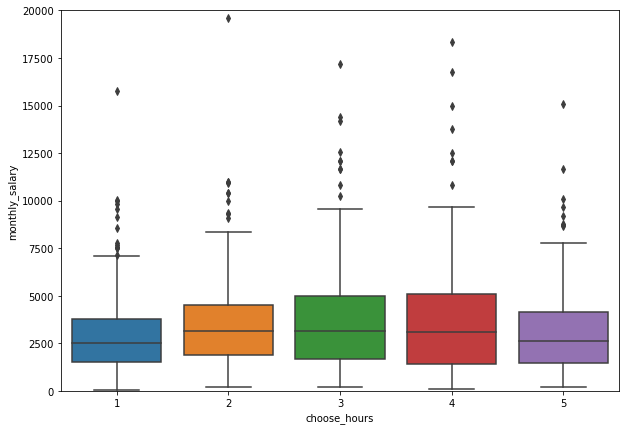

In [28]:
fig, axes = plt.subplots(figsize=(10,7), ncols=1)
sns.boxplot(x='choose_hours', y='monthly_salary', data=female_df)
plt.ylim(0,20000)

Women who choose there hours the more freelly, have the smallest monthly salary.

 > ### Occupation:

Let's check the difference in monthly salary in each occupation between men and women.

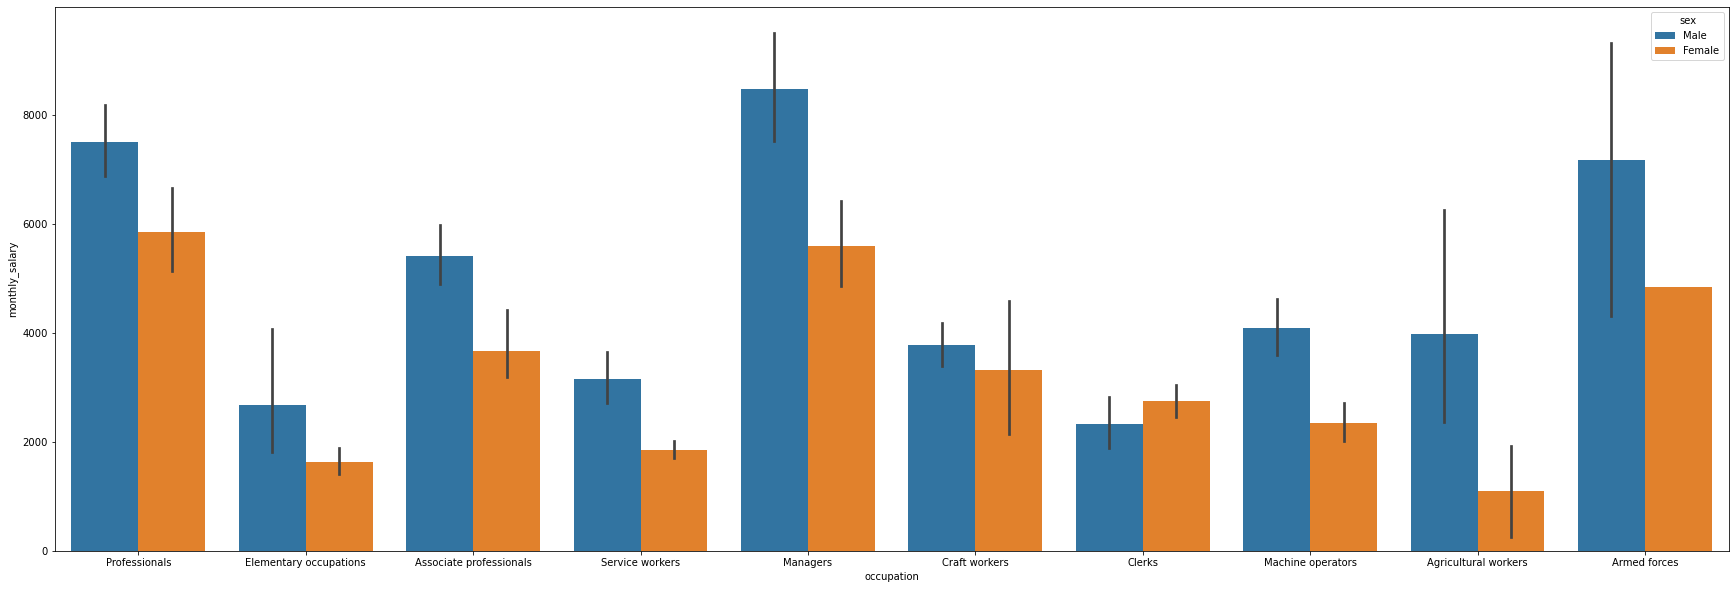

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x="occupation", y="monthly_salary", hue="sex",  data=salary_data)
plt.show()

We can see that only female clerks make more then male clerks.

*Let's check the difference in monthly salary.*

In [30]:
Clerks = salary_data[salary_data['occupation'].str.contains('Clerks', na=False)]

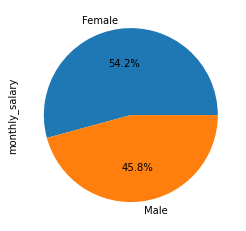

In [31]:
Clerks.groupby('sex')['monthly_salary'].mean().plot.pie(autopct='%1.1f%%')

The difference in monthly salary is about 10%.

#### High-Tech:

There's a common belief that in high tech the salary would be the same.                             
Let's focus on managers.

In [32]:
Men_tech= tech[tech['sex'].str.contains('Male')].copy()
Women_tech= tech[tech['sex'].str.contains('Female')].copy()

In [33]:
manager_men_tech = Men_tech[Men_tech['occupation'].str.contains('Managers')]
manager_women_tech = Women_tech[Women_tech['occupation'].str.contains('Managers')]

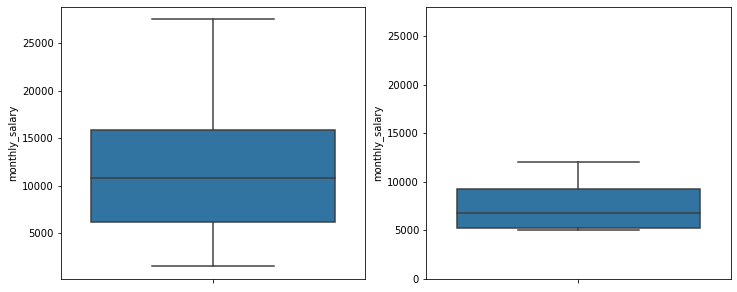

In [34]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
sns.boxplot(ax=axes[0], y='monthly_salary', data=manager_men_tech)
plt.ylim(0,28000)
sns.boxplot(ax=axes[1], y='monthly_salary', data=manager_women_tech)

Surprisingly even in High Tech managers there is a huge difference between men and women.

---

> ## Observation 3:
> #### There are big differences between men and women even in situations where we thought there wouldn't be.



---

## **Prediction:**

In [35]:
salary_data_with_out_monthly_salary = original_data.drop(columns=['monthly_salary'])

In [36]:
predict_featers = salary_data_with_out_monthly_salary.columns
X = original_data[predict_featers]
y = original_data['monthly_salary']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=82)
model_Forest = RandomForestRegressor(max_samples=100,random_state=82)
model_Forest.fit(X_train, y_train)

RandomForestRegressor(max_samples=100, random_state=82)

In [37]:
def eval(X_test,y_test,model):
    predict = model.predict(X_test)
    print("MSE: {:.3f}".format(mse(predict,y_test,squared=False)))


In [38]:
eval(X_test,y_test,model_Forest)

MSE: 4108.259


In [39]:
y_test.std()

4984.027791750432

---

> ### prediction observation:
> We chose to present Regressor predictions because we want to predict salaries.                            
> We decided to present both a Forest Regressor and a decision tree Regressor to see which one is more accurate.                          
> we found that the Forest Regressor is more accurate because the MSE came out lower.


---

# Thank you very much :)